# PushShift Reddit Web Scraping

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns


import requests
from bs4 import BeautifulSoup    
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
from collections import Counter
import re


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, FunctionTransformer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)


pd.options.display.max_colwidth = 400
%config InlineBackend.figure_format = 'retina'

## Fetch 10000 posts from Uplifting News with score >= 10 and comments >= 10

> - this was done as initial QC - a lot of articles are posted everyday in these subreddits, and most of them do not receive as much attention from users. 
> - from my initial approach to scrape 50,000 posts from both, I tightened the parameters to get 10,000 posts that pass my criteria as QC measure

In [52]:
# adapted from Hov's function in the practice notebook
url = 'https://api.pushshift.io/reddit/submission/search'
dfs = []


# initially, I tried to collect 50,000 posts, but with my parameters, 
# at around 10,000, I hit the oldest in the database. 

loops = 500
subreddit = 'UpliftingNews'
start_time = time.time()

# as a quality control measure, I limited the posts to those with 10 or more score/comment. 
params = {
    'subreddit': subreddit,
    'size': 100,
    'score': '>9',
    'num_comments' : '>9',
    'before': round(start_time)
    }

for i in range(loops):
    current_time = time.time()
    
    #requesting data
    res = requests.get(url, params)
    print(f'res {i+1} code: ', res.status_code)
    
    if res.status_code != 200:
        pass
    else:
        data = res.json()
        posts = data['data']
        post_df = pd.DataFrame(posts)
        dfs.append(post_df)
        #get oldest post time and use as before parameter in next request
        oldest = post_df['created_utc'].min()
        params['before'] = oldest

    time.sleep(1)
    
upliftingnews = pd.concat(dfs)

res 1 code:  200
res 2 code:  200
res 3 code:  200
res 4 code:  200
res 5 code:  200
res 6 code:  200
res 7 code:  200
res 8 code:  200
res 9 code:  200
res 10 code:  502
res 11 code:  200
res 12 code:  200
res 13 code:  200
res 14 code:  200
res 15 code:  200
res 16 code:  200
res 17 code:  200
res 18 code:  200
res 19 code:  502
res 20 code:  502
res 21 code:  200
res 22 code:  200
res 23 code:  200
res 24 code:  200
res 25 code:  200
res 26 code:  200
res 27 code:  200
res 28 code:  200
res 29 code:  200
res 30 code:  200
res 31 code:  200
res 32 code:  200
res 33 code:  200
res 34 code:  200
res 35 code:  200
res 36 code:  200
res 37 code:  200
res 38 code:  200
res 39 code:  200
res 40 code:  200
res 41 code:  200
res 42 code:  200
res 43 code:  200
res 44 code:  200
res 45 code:  200
res 46 code:  200
res 47 code:  502
res 48 code:  200
res 49 code:  200
res 50 code:  200
res 51 code:  200
res 52 code:  200
res 53 code:  200
res 54 code:  200
res 55 code:  200
res 56 code:  200
r

KeyError: 'created_utc'

In [54]:
# key error occured so I decided to 
# check the oldest post - March 2012
upliftingnews['created_utc'].min()

1337736782

**The loop stops after 116. Upon checcking the oldest post, I realized that this was the beginning of this particular database and decided to end the scrape here.**

In [57]:
upliftingnews.shape

(10841, 94)

## **send the raw file from Uplifting News to CSV** 

In [56]:
upliftingnews.to_csv('upliftingnews.csv', index=False)

## Fetch 10000 posts from NottheOnion with score >= 10 and comments >= 10

In [37]:
url = 'https://api.pushshift.io/reddit/submission/search'
dfs = []
loops = 500
subreddit = 'nottheonion'
start_time = time.time()

params = {
    'subreddit': subreddit,
    'size': 100,
    'score': '>9',
    'num_comments': '>9',
    'before': round(start_time)
}

for i in range(loops):
    current_time = time.time()

    #requesting data
    res = requests.get(url, params)
    print(f'res {i+1} code: ', res.status_code)

    if res.status_code != 200:
        pass
    else:
        data = res.json()
        posts = data['data']
        post_df = pd.DataFrame(posts)
        dfs.append(post_df)
        #get oldest post time and use as before parameter in next request
        oldest = post_df['created_utc'].min()
        params['before'] = oldest

    time.sleep(1)

nottheonion1 = pd.concat(dfs)

res 1 code:  200
res 2 code:  200
res 3 code:  200
res 4 code:  200
res 5 code:  200
res 6 code:  200
res 7 code:  200
res 8 code:  200
res 9 code:  502
res 10 code:  200
res 11 code:  200
res 12 code:  200
res 13 code:  200
res 14 code:  200
res 15 code:  200
res 16 code:  200
res 17 code:  200
res 18 code:  200
res 19 code:  200
res 20 code:  200
res 21 code:  200
res 22 code:  200
res 23 code:  200
res 24 code:  200
res 25 code:  200
res 26 code:  200
res 27 code:  200
res 28 code:  200
res 29 code:  200
res 30 code:  200
res 31 code:  200
res 32 code:  200
res 33 code:  200
res 34 code:  200
res 35 code:  200
res 36 code:  200
res 37 code:  200
res 38 code:  200
res 39 code:  200
res 40 code:  200
res 41 code:  200
res 42 code:  200
res 43 code:  200
res 44 code:  200
res 45 code:  200
res 46 code:  200
res 47 code:  200
res 48 code:  200
res 49 code:  200
res 50 code:  200
res 51 code:  200
res 52 code:  200
res 53 code:  200
res 54 code:  200
res 55 code:  200
res 56 code:  200
r

KeyError: 'created_utc'

In [46]:
# check the oldest post - March 2012

nottheonion1['created_utc'].min()

1331490414

I repeat the prodecure with NottheOnion subreddit. However, the loop stops after 345, and the oldest posting date matches UpliftingNews. More number of NottheOnion posts qualify for my initial QC, which I would now have to take care of.

## **send the raw file from NottheOnion to CSV** 

**send the raw file to CSV** 

In [55]:
nottheonion1.to_csv('nottheonion.csv', index=False)

# EDA

## Import data and clean columns

In [211]:
uplifting = pd.read_csv('upliftingnews.csv')

/Users/alyssiaoh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,4,6,8,9,10,11,12,16,18,19,20,21,22,24,26,27,28,29,30,31,35,37,44,45,46,50,56,59,60,62,63,64,66,68,69,72,73,75,76,79,80,81,82,85,92,93) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [212]:
# drop duplicate posts based on title
uplifting.drop_duplicates(subset=['title'], keep='first', inplace=True, ignore_index=True)

In [213]:
# adding a new column 'datetime' from 'created_utc'
uplifting['datetime'] = pd.to_datetime(uplifting['created_utc'], unit='s')

In [259]:
# check the shape again after dropping duplicates 
uplifting.shape

(10736, 95)

In [214]:
# using iloc, you can made modifications to match the size of NottheOnion file
uplifting_df = uplifting_df.iloc[0:10736]

In [215]:
# limiting the dataframe to only relavent columns
uplifting_df = uplifting[['datetime', 'title', 'score', 'num_comments']]

In [251]:
uplifting_df.head()

,datetime,title,score,num_comments
0,2020-12-19 18:01:37,Anthony Fauci reassures small children with claim to have vaccinated Santa,10,11
1,2020-12-19 17:16:47,Anthony Fauci reassures small children with claim to have vaccinated Santa | US news,13,28
2,2020-12-19 09:33:05,"Mongolia will pay for electricity, water, heat and garbage collection for all Of Its citizens For Seven Months To Help With COVID-19 Recovery",109,1194
3,2020-12-19 07:29:26,Small-business advocate releases free browser plugin that provides local alternatives to products on Amazon &amp; other corporate sites,63,13
4,2020-12-19 03:07:28,The Moderna Covid-19 vaccine has been given authorisation for use in the US by the country’s Food and Drug Administration (FDA).,55,13


In [196]:
uplifting_df.describe()

,score,num_comments
count,10736.000000,10736.000000
mean,4196.946256,210.374907
std,9377.812461,417.205393
min,10.000000,10.000000
25%,129.000000,17.000000
50%,501.000000,40.000000
75%,3082.000000,207.000000
max,124278.000000,5642.000000


In [278]:
uplifting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10736 entries, 0 to 10735
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10736 non-null  datetime64[ns]
 1   title         10736 non-null  object        
 2   score         10736 non-null  int64         
 3   num_comments  10736 non-null  int64         
 4   title_len     10736 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 419.5+ KB


In [263]:
uplifting_df.shape

(10736, 5)

**Double check the data types of each column and shape, then save as CSV**

In [203]:
nottheonion = pd.read_csv('nottheonion.csv')

/Users/alyssiaoh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,3,4,5,6,8,9,10,11,12,14,15,18,20,21,22,23,24,26,27,28,29,30,31,32,33,37,39,40,41,46,47,48,52,58,61,62,65,66,68,70,71,74,76,78,79,80,81,82,85,88,89,90,92,93,94,95,100,101) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [204]:

nottheonion.drop_duplicates(subset=['title'], keep='first', inplace=True, ignore_index=True)

In [205]:
nottheonion['datetime'] = pd.to_datetime(nottheonion['created_utc'], unit='s')

In [226]:
nottheonion.shape

(32204, 103)

In [209]:
nottheonion_df = nottheonion[['datetime', 'title', 'score', 'num_comments']]

In [228]:
nottheonion_df.describe()

,score,num_comments
count,32204.000000,32204.000000
mean,1601.157030,173.949882
std,5951.063625,520.325434
min,10.000000,10.000000
25%,50.000000,15.000000
50%,130.000000,27.000000
75%,498.250000,80.000000
max,118958.000000,11664.000000


In [ ]:
# slice nottheonion df to match the shape of uplifting subreddit df
nottheonion_df = nottheonion_df.iloc[0:10736]

In [234]:
nottheonion_df.shape

(10736, 4)

In [279]:
nottheonion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10736 entries, 0 to 10735
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10736 non-null  datetime64[ns]
 1   title         10736 non-null  object        
 2   score         10736 non-null  int64         
 3   num_comments  10736 non-null  int64         
 4   title_len     10736 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 419.5+ KB


## Look at the histograms of features


### Histogram of score distribution of two subreddits

(0.0, 1000.0)

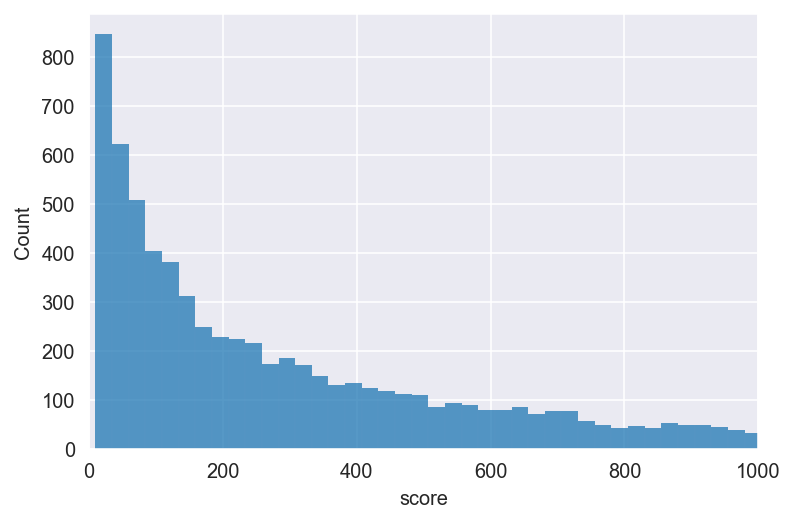

In [236]:
sns.histplot(uplifting_df['score'], bins=5000)
plt.xlim(0, 1000)

(0.0, 1000.0)

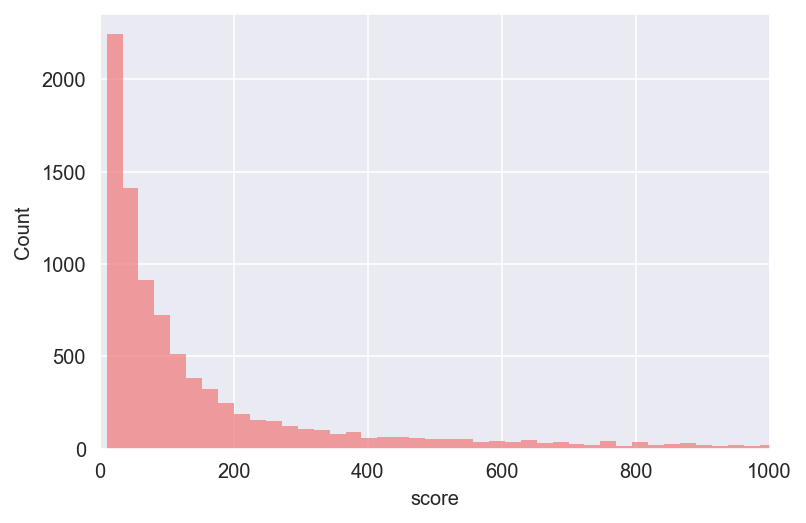

In [303]:
sns.histplot(nottheonion_df['score'], bins=5000, color='lightcoral')
plt.xlim(0, 1000)

- The distribution of score is wider for UpliftingNews, also there seems to be a lot more number of posts with scores higher than 500.


Now, I want to see how the length of title vary between the two.

### Histogram of title length distribution

In [264]:
uplifting_df['title_len'] = uplifting_df['title'].map(lambda x: len(x))

In [254]:
# 5 longest posts
nottheonion_df['title_len'] = nottheonion_df['title'].map(lambda x: len(x))

<AxesSubplot:xlabel='title_len', ylabel='Count'>

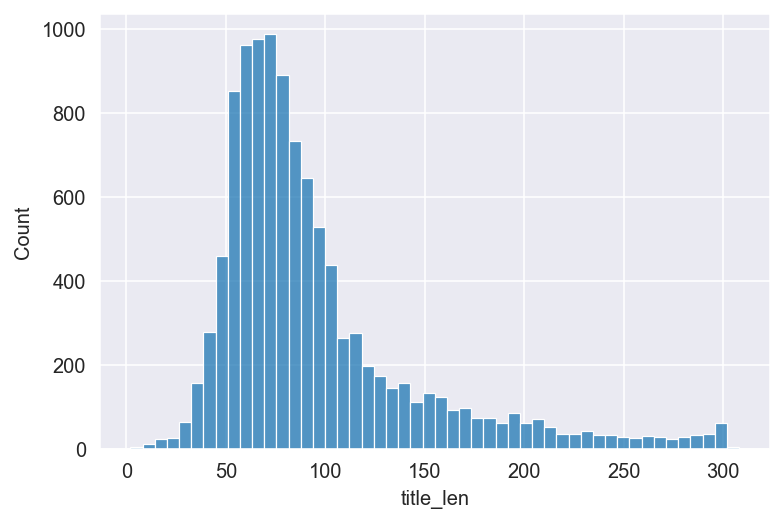

In [269]:
sns.histplot(uplifting_df['title_len'], bins=50)

<AxesSubplot:xlabel='title_len', ylabel='Count'>

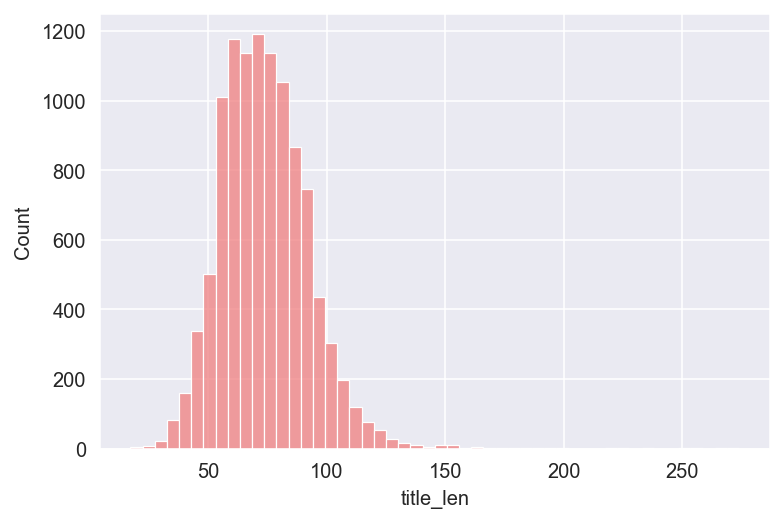

In [304]:
sns.histplot(nottheonion_df['title_len'], bins=50, color='lightcoral')

I wanted to see if counting the number of words would make any difference.

In [ ]:
uplifting_df['title_word_count'] = uplifting_df['title'].apply(lambda x: len(x.split(" ")))

In [192]:
uplifting_df['title_word_count'].describe()

count    10736.000000
mean        15.919057
std          9.001602
min          1.000000
25%         10.000000
50%         13.000000
75%         18.000000
max         61.000000
Name: title_word_count, dtype: float64

In [ ]:
nottheonion_df['title_word_count'] = nottheonion_df['title'].apply(lambda x: len(x.split(" ")))

In [193]:
nottheonion_df['title_word_count'].describe()

count    10736.000000
mean        12.002515
std          3.391198
min          2.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         48.000000
Name: title_word_count, dtype: float64

<AxesSubplot:xlabel='title_word_count', ylabel='Count'>

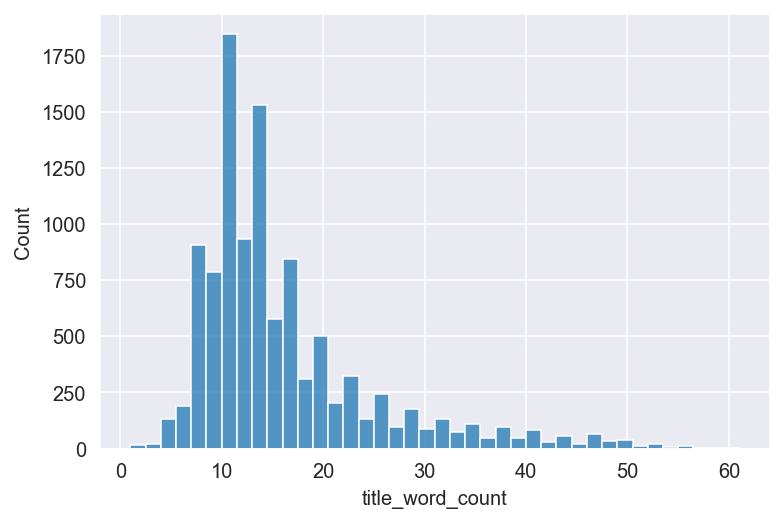

In [311]:
sns.histplot(uplifting_df['title_word_count'], bins=40)

<AxesSubplot:xlabel='title_word_count', ylabel='Count'>

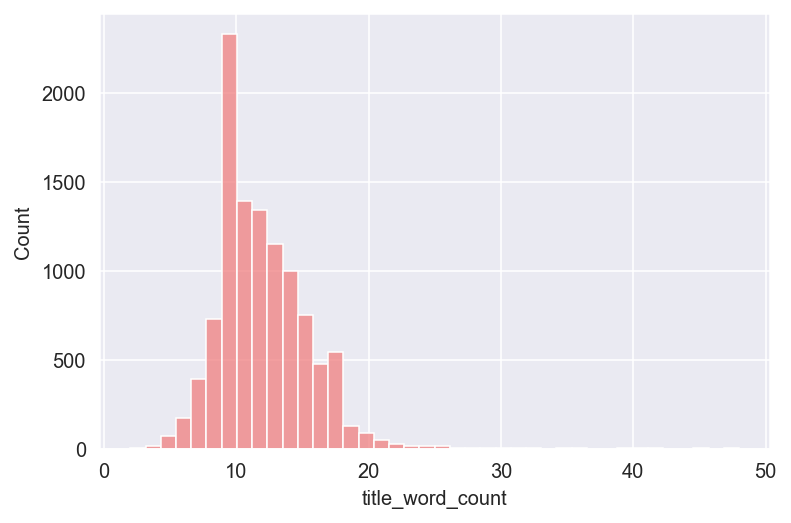

In [310]:
sns.histplot(nottheonion_df['title_word_count'], bins=40, color='lightcoral')

### Histogram of number of comments distribution

(0.0, 300.0)

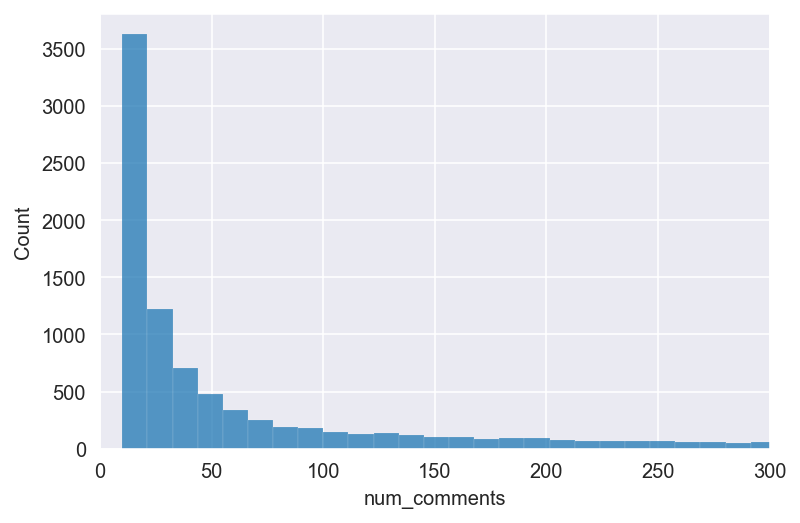

In [276]:
sns.histplot(uplifting_df['num_comments'], bins=500)
plt.xlim(0, 300)

(0.0, 300.0)

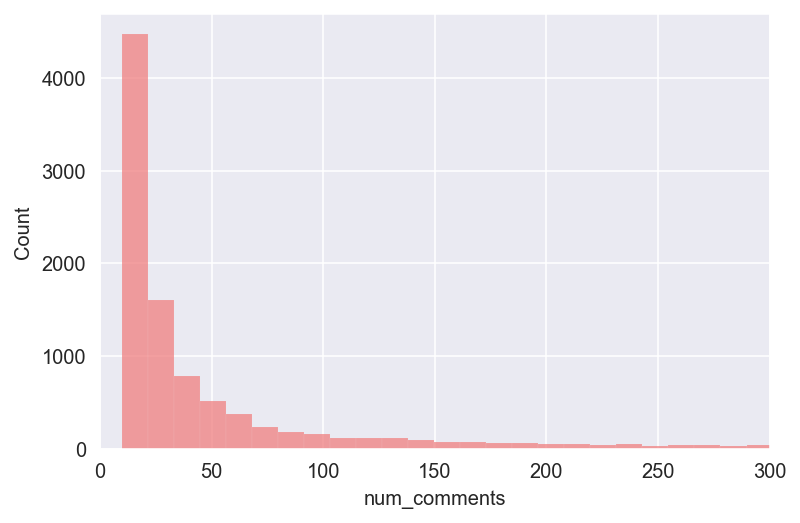

In [305]:
sns.histplot(nottheonion_df['num_comments'], bins=1000, color='lightcoral')
plt.xlim(0, 300)

# Conclusion

- Histograms reveal wider distribution for UpliftingNews 
- NottheOnion follows narrower formula for the title and distribution is tighter

In [71]:
nottheonion_df.to_csv('nottheonion_df.csv', index=False)

In [72]:
uplifting_df.to_csv('uplifting_df.csv', index=False)

In [4]:
nottheonion_df = pd.read_csv('nottheonion_df.csv')

In [5]:
uplifting_df = pd.read_csv('uplifting_df.csv')